## Determine the fidelity of offline rebinning compared to online regridding
MOM6 has the capacity to interpolate tracer fields online onto "diagnostic" vertical coordinates, e.g. rho2 or z. However, truncation errors in the interpolation mean that there are issues with closing the budgets in the new vertical coordinates (see calc_budget_tracer_regridded, and work by Andrew Shao). Furthermore, it is not always possible to do such online regridding (e.g. for CMIP6 data). Thus, we wish to determine whether an offline rebinning approach (using xhistogram) can reproduce budget closure with accuracy at least comparable to the online regridding approach.  

There are two main difficulties with the offline binning approach. First, defining bin widths can result in data gaps (if no grid cell exists with a tracer value that fits into that bin). Secondly, the binning procedure necessarily assigns the budget terms to a bin according to the _time-mean_ tracer value for that grid cell.  

We explore the sensitivity of the binning approach to both these issues, using daily output from the ESM4 model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import budgetcalcs as bc
import vertical_rebin as vr
from xhistogram.xarray import histogram
import numpy as np

In [3]:
rootdir = '/archive/gam/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/history/'
filename_daily_native = '08990101.ocean_daily.nc'
filename_daily_rho2 = '08990101.ocean_daily_rho2.nc'
filename_monthly_native = '08990101.ocean_month.nc'
filename_monthly_rho2 = '08990101.ocean_month_rho2.nc'
filename_grid = '08990101.ocean_static_no_mask_table.nc'
ds_daily_native = xr.open_dataset(rootdir+filename_daily_native,decode_times=False)
ds_daily_rho2 = xr.open_dataset(rootdir+filename_daily_rho2,decode_times=False)
ds_monthly_native = xr.open_dataset(rootdir+filename_monthly_native,decode_times=False)
ds_monthly_rho2 = xr.open_dataset(rootdir+filename_monthly_rho2,decode_times=False)
grid = xr.open_dataset(rootdir+filename_grid)

In [4]:
ds_monthly_native_rebinned = vr.vertical_rebin_wrapper(ds_monthly_native,"rhopot2",ds_monthly_rho2.rho2_i.values,dz_name="thkcello",vert_dim="zl")

In [7]:
term = 'T_advection_xy'
truth = (ds_daily_rho2[term]*grid.areacello).sum(dim=['xh','yh']).mean(dim='time').squeeze()
alsotruth = (ds_monthly_rho2[term]*grid.areacello).sum(dim=['xh','yh']).squeeze()

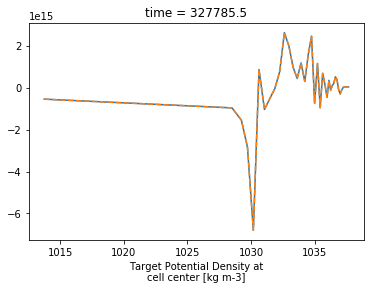

In [9]:
truth.plot()
alsotruth.plot(linestyle='--')